
Starting new simulation run:
Vehicle failure for Driver 7 on lap 2 - DNF
Incident on lap 10 involving Driver 0 - DNF
1. Driver 10, Avg Lap Time: 85.95 seconds, Score: 25
2. Driver 8, Avg Lap Time: 93.42 seconds, Score: 23
3. Driver 7, Avg Lap Time: 102.32 seconds, Score: 21
4. Driver 5, Avg Lap Time: 106.91 seconds, Score: 19
5. Driver 7, Avg Lap Time: 107.02 seconds, Score: 0
6. Driver 0, Avg Lap Time: 89.46 seconds, Score: 0

Team Standings:
Team Red: 48 points
Team Green: 40 points
Team Blue: 0 points


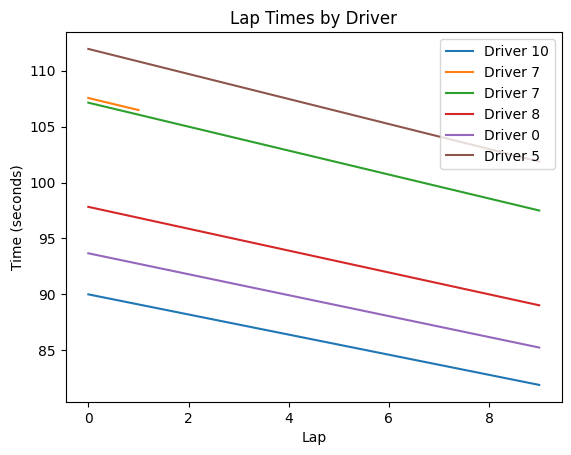

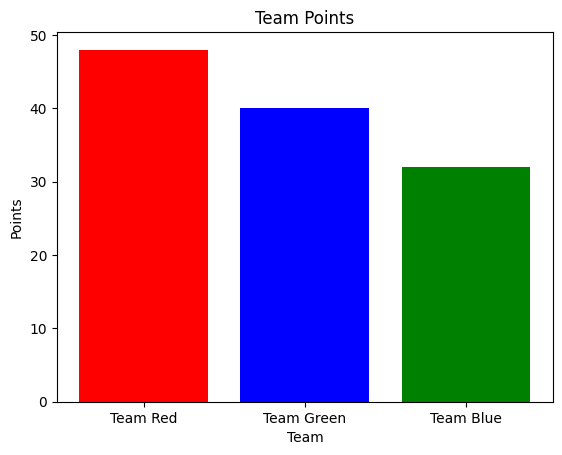

In [5]:
import random
import matplotlib.pyplot as plt

# Define Vehicle class
class Vehicle:
    def __init__(self, power, aerodynamics, weight, reliability, suspension, fuel_efficiency):
        self.power = power  # Horsepower
        self.aerodynamics = aerodynamics  # Drag coefficient and downforce
        self.weight = weight  # Total weight
        self.reliability = reliability  # Probability of component failure
        self.suspension = suspension  # Suspension configuration
        self.fuel_efficiency = fuel_efficiency  # Fuel consumption rate

# Define Driver class
class Driver:
    def __init__(self, skill, stress, experience):
        self.skill = skill  # Ability to push the car to its limit
        self.stress = stress  # Affects concentration and performance
        self.experience = experience  # Track knowledge and adaptability

# Define Track class
class Track:
    def __init__(self, circuit_type, track_condition, weather):
        self.circuit_type = circuit_type  # Circuit speed and curve types
        self.track_condition = track_condition  # Surface grip
        self.weather = weather  # Weather conditions

# Define RaceSimulation class
class RaceSimulation:
    def __init__(self, vehicles, drivers, track, tire_strategies, team_assignments):
        self.vehicles = vehicles
        self.drivers = drivers
        self.track = track
        self.tire_strategies = tire_strategies
        self.team_assignments = team_assignments  # Mapping drivers to their teams
        self.results = []
        self.lap_times = {driver: [] for driver in self.drivers}
        self.dnfs = []  # List to track DNFs
        self.incidents = 0  # Reset incidents for each simulation

    def simulate_race(self, laps):
        dnfs_allowed = 2
        for lap in range(laps):
            if len(self.dnfs) >= dnfs_allowed:
                break
            for i, (vehicle, driver) in enumerate(zip(self.vehicles, self.drivers)):
                if driver in self.dnfs:
                    continue
                tire_strategy = self.tire_strategies[i]
                lap_time = self.calculate_lap_time(vehicle, driver, tire_strategy, lap)
                self.lap_times[driver].append(lap_time)
                if random.random() > vehicle.reliability and len(self.dnfs) < dnfs_allowed:
                    self.dnfs.append(driver)
                    print(f"Vehicle failure for Driver {driver.experience} on lap {lap + 1} - DNF")
                elif self.incidents < 3 and random.random() < 0.05 and len(self.dnfs) < dnfs_allowed:
                    self.incidents += 1
                    self.dnfs.append(driver)
                    print(f"Incident on lap {lap + 1} involving Driver {driver.experience} - DNF")

        self.generate_race_results(laps)
        self.plot_results()

    def calculate_lap_time(self, vehicle, driver, tire_strategy, lap):
        base_time = 90  # Base lap time for Bahrain
        tire_factor = self.get_tire_factor(tire_strategy, lap)
        power_factor = vehicle.power / 1000
        weight_factor = 750 / vehicle.weight
        skill_factor = driver.skill / 100
        lap_time = base_time / (power_factor * weight_factor * skill_factor) * tire_factor
        return lap_time

    def get_tire_factor(self, tire_strategy, lap):
        tire_wear_factor = 1 - (0.01 * lap)
        if tire_strategy == 'soft':
            return 0.98 * tire_wear_factor
        elif tire_strategy == 'medium':
            return 1.0 * tire_wear_factor
        elif tire_strategy == 'hard':
            return 1.02 * tire_wear_factor

    def generate_race_results(self, total_laps):
        sorted_drivers = sorted(self.lap_times.keys(), key=lambda d: sum(self.lap_times[d]) if d not in self.dnfs else float('inf'))
        scores = {driver: 0 for driver in self.drivers}
        for position, driver in enumerate(sorted_drivers, start=1):
            if driver not in self.dnfs:
                scores[driver] = max(0, 25 - 2 * (position - 1))
            print(f"{position}. Driver {driver.experience}, Avg Lap Time: {sum(self.lap_times[driver])/len(self.lap_times[driver]):.2f} seconds, Score: {scores[driver]}")

        self.calculate_team_points(scores)

    def calculate_team_points(self, driver_scores):
        team_scores = {}
        for driver, team in self.team_assignments.items():
            if team not in team_scores:
                team_scores[team] = 0
            team_scores[team] += driver_scores[driver]

        print("\nTeam Standings:")
        for team, score in sorted(team_scores.items(), key=lambda item: item[1], reverse=True):
            print(f"{team}: {score} points")

    def plot_results(self):
        for driver, times in self.lap_times.items():
            plt.plot(times, label=f"Driver {driver.experience}")

        plt.title("Lap Times by Driver")
        plt.xlabel("Lap")
        plt.ylabel("Time (seconds)")
        plt.legend()
        plt.show()

        driver_scores = {driver: max(0, 25 - 2 * (position - 1)) for position, driver in enumerate(sorted(self.lap_times, key=lambda d: sum(self.lap_times[d]) if d not in self.dnfs else float('inf')), start=1)}
        team_scores = {}
        for driver, team in self.team_assignments.items():
            if team not in team_scores:
                team_scores[team] = 0
            team_scores[team] += driver_scores[driver]

        teams, scores = zip(*sorted(team_scores.items(), key=lambda item: item[1], reverse=True))
        plt.bar(teams, scores, color=['red', 'blue', 'green'])
        plt.title("Team Points")
        plt.xlabel("Team")
        plt.ylabel("Points")
        plt.show()

# Example setup and simulation run setup
vehicles = [Vehicle(1000, (0.29, 500), 750, 0.95, 'soft', 0.1) for _ in range(6)]
drivers = [Driver(random.randint(80, 100), random.randint(0, 10), random.randint(0, 10)) for _ in range(6)]
track = Track('high-speed', 'dry', 'sunny')
tire_strategies = ['soft', 'soft', 'medium', 'medium', 'hard', 'hard']
team_assignments = {drivers[i]: f"Team {['Red', 'Blue', 'Green'][i % 3]}" for i in range(6)}

# Running the simulation
print("\nStarting new simulation run:")
race_simulation = RaceSimulation(vehicles, drivers, track, tire_strategies, team_assignments)
race_simulation.simulate_race(laps=57)
